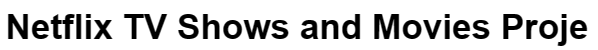

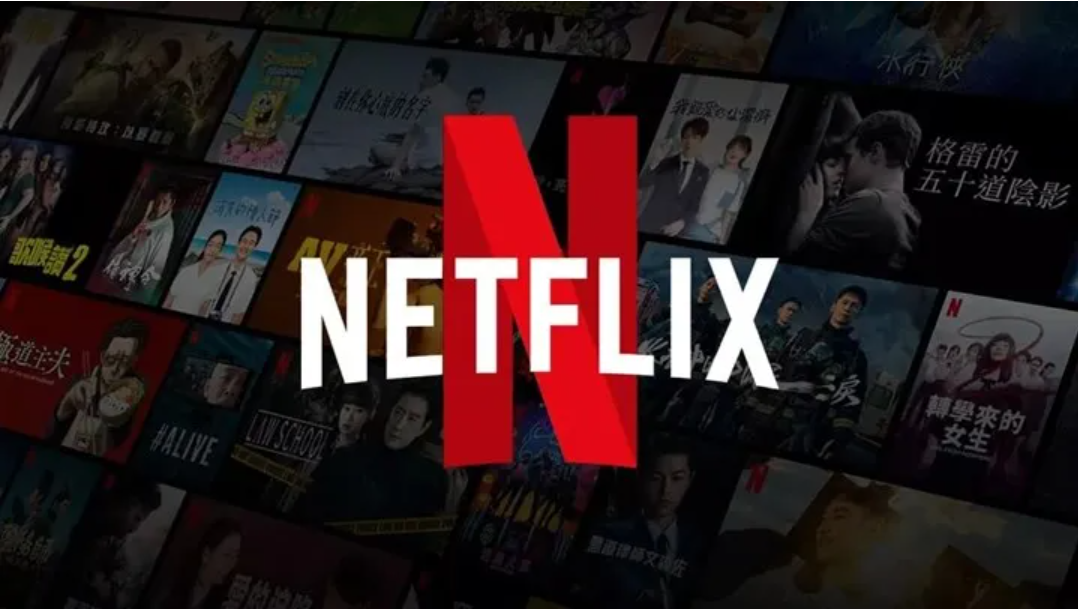

Netflix Hakkında

Netflix, Inc. bir Amerikan abonelik yayın hizmeti ve yapım şirketidir. 29 Ağustos 1997'de faaliyete geçen şirket, Netflix Originals olarak bilinen kendi yapımlarının yanı sıra dağıtım anlaşmaları yoluyla bir film ve televizyon dizisi kütüphanesi sunmaktadır.

31 Mart 2022 itibarıyla Netflix'in 74,6 milyonu Amerika Birleşik Devletleri ve Kanada'da, 74,0 milyonu Avrupa, Orta Doğu ve Afrika'da, 39,9 milyonu Latin Amerika'da ve 32,7 milyonu Asya-Pasifik'te olmak üzere dünya çapında 221,6 milyondan fazla abonesi vardı. Çin Anakarası, Suriye, Kuzey Kore ve Rusya dışında tüm dünyada kullanılabilir. Netflix bağımsız film dağıtımında önemli bir rol oynamıştır ve Motion Picture Association (MPA) üyesidir.

Netflix uyumlu cihazlar listesinde yer alan akıllı TV'ler, televizyonlara bağlı set üstü kutular, tablet bilgisayarlar, akıllı telefonlar, dijital medya oynatıcılar, Blu-ray oynatıcılar, video oyun konsolları ve sanal gerçeklik kulaklıklarına yüklenen uygulama yazılımları aracılığıyla veya web tarayıcıları üzerinden Netflix'e erişilebilmektedir.4K çözünürlükte mevcuttur. Amerika Birleşik Devletleri'nde şirket, bölgesel depolardan Amerika Birleşik Devletleri Posta Servisi aracılığıyla bireysel olarak teslim edilen DVD ve Blu-ray kiralama hizmeti sunmaktadır.

Netflix, yukarıda belirtilen tarihte Reed Hastings ve Marc Randolph tarafından Scotts Valley, Kaliforniya'da kuruldu. Netflix başlangıçta posta yoluyla hem DVD sattı hem de kiraladı, ancak DVD kiralama işine odaklanmak için satışlar bir yıl içinde ortadan kaldırıldı. 2007 yılında Netflix, talep üzerine medya ve video akışını tanıttı. Şirket 2010 yılında Kanada'ya, ardından Latin Amerika ve Karayipler'e açıldı. Netflix 2013 yılında ilk dizisi House of Cards'ı yayınlayarak içerik yapım sektörüne girdi. Ocak 2016'da 130 ülkeye daha genişledi ve daha sonra 190 ülkede faaliyet gösterdi.

Şirket, Fortune 500 listesinde 115. sırada ve Forbes Global 2000 listesinde 219. sırada yer almaktadır. Şubat 2022 itibarıyla piyasa değerine göre en büyük ikinci eğlence/medya şirketidir. Netflix, 2021 yılında Morning Consult tarafından küresel olarak en güvenilir sekizinci marka olarak gösterilmiştir. 2010'lu yıllarda Netflix, toplam %3.693 getiri ile S&P 500 borsa endeksinde en iyi performans gösteren hisse senedi olmuştur.

# Projenin Amacı

Bu proje, Netflix'teki filmler ve TV şovları hakkında analizler yapmayı ve kişisel tavsiye sistemleri oluşturmayı amaçlamaktadır. Hedefler:

1.Tavsiye Sistemi
Bu projede, Netflix platformundaki içerikleri Tür (Film veya Gösteri), Tür (genre), Yıl, Yönetmen ve IMDb Puanı gibi kriterlere göre filtreleyerek kullanıcılara öneriler sunan etkileşimli bir öneri sistemi geliştirdim.

2.Tavsiye Sistemi
Bu tavsiye sisteminin amacı, kullanıcıların Netflix platformunda izledikleri bir film veya gösteriye göre benzer öneriler almasını sağlamaktır.

##  Veriyi Tanıma

Bu veri seti, başlık (titles.csv) ve oyuncu kadrosu (credits.csv) içeren iki dosya içeriyor.

Bu veri seti, Netflix'te +5k benzersiz başlığı içeriyor ve bunların bilgisini içeren 15 sütun bulunuyor, bunlar arasında:

**id:** JustWatch'taki başlık kimliği.

**title:** Başlığın adı.

**show_type:** TV şovu mu yoksa film mi.

**description:** Kısa bir açıklama.

**release_year:** Yayın yılı.

**age_certification:** Yaş sertifikası.

**runtime:** Bölümün uzunluğu (SHOW) veya film.

**genres:** Türlerin listesi.

**production_countries:** Başlığı üreten ülkelerin listesi.

**seasons:** Bir GÖSTERİ ise sezon sayısı.

**imdb_id:** IMDB'deki başlık kimliği.

**imdb_score:** IMDB'deki puan.

**imdb_votes:** IMDB'deki oylar.

**tmdb_popularity:** TMDB'deki popülerlik.

**tmdb_score:** TMDB'deki puan.

Ve Netflix başlıklarında +77k aktör ve yönetmen kredisine sahip 5 sütun bulunuyor, bunlar arasında:

**person_ID:** JustWatch'taki kişi kimliği.

**id:** JustWatch'taki başlık kimliği.

**name:** Aktörün veya yönetmenin adı.

**character_name:** Karakterin adı.

**role:** OYUNCU veya YÖNETMEN.


##  Kütüphaneleri yükleme

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.figure_factory as ff
from itertools import cycle
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 200) # To show the whole description of titles

##  Veriyi düzenleme

In [19]:
credits = pd.read_csv('credits.csv')
titles = pd.read_csv('titles.csv')

In [20]:
credits.head(10)

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
5,32267,tm84618,Peter Boyle,Wizard,ACTOR
6,519612,tm84618,Leonard Harris,Senator Charles Palantine,ACTOR
7,29068,tm84618,Diahnne Abbott,Concession Girl,ACTOR
8,519613,tm84618,Gino Ardito,Policeman at Rally,ACTOR
9,3308,tm84618,Martin Scorsese,Passenger Watching Silhouette,ACTOR


In [21]:
titles.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,"This collection includes 12 World War II-era propaganda films — many of which are graphic and offensive — discussed in the docuseries ""Five Came Back.""",1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,"Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they'll never forget into the dangerous Ameri...",1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir G...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,"12 American military prisoners in World War II are ordered to infiltrate a well-guarded enemy château and kill the Nazi officers vacationing there. The soldiers, most of whom are facing death sent...",1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [24]:
titles.shape

(5850, 15)

In [25]:
credits.shape

(77801, 5)

In [26]:
# 'id' üzerinden birleştir
combined_data = pd.merge(titles, credits, on='id', how='inner')

In [27]:
combined_data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,7064,Albert Brooks,Tom,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,Betsy,ACTOR


In [28]:
combined_data.shape

(77801, 19)

In [29]:
combined_data.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role'],
      dtype='object')

In [30]:
# Filter rows where 'role' contains "ACTOR" or "DIRECTOR"
actors_data = combined_data[combined_data['role'] == "ACTOR"]
directors_data = combined_data[combined_data['role'] == "DIRECTOR"]

# Aggregate actors and directors by id (to ensure matching on a unique identifier)
actors_aggregated = actors_data.groupby('id')['name'].apply(lambda x: ', '.join(x.dropna())).reset_index()
directors_aggregated = directors_data.groupby('id')['name'].apply(lambda x: ', '.join(x.dropna())).reset_index()

# Merge actors and directors back into a single dataframe
actors_aggregated.rename(columns={'name': 'actors'}, inplace=True)
directors_aggregated.rename(columns={'name': 'directors'}, inplace=True)

# Merge with the original data by 'id'
final_data = pd.merge(combined_data.drop(columns=['name', 'character', 'role', 'person_id']), actors_aggregated, on='id', how='left')
final_data = pd.merge(final_data, directors_aggregated, on='id', how='left')

# Remove duplicate rows based on 'id' and other key columns, keeping the first occurrence
final_data = final_data.drop_duplicates(subset=['id', 'title', 'type', 'description', 'release_year'])

# Display the first few rows of the final merged dataframe
final_data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actors,directors
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,"Robert De Niro, Jodie Foster, Albert Brooks, Harvey Keitel, Cybill Shepherd, Peter Boyle, Leonard Harris, Diahnne Abbott, Gino Ardito, Martin Scorsese, Murray Moston, Richard Higgs, Bill Minkin, B...",Martin Scorsese
37,tm154986,Deliverance,MOVIE,"Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they'll never forget into the dangerous Ameri...",1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,"Jon Voight, Burt Reynolds, Ned Beatty, Ronny Cox, Ed Ramey, Billy Redden, Seamon Glass, Randall Deal, Bill McKinney, Herbert 'Cowboy' Coward, Lewis Crone, Ken Keener, Johnny Popwell, John Fowler, ...",John Boorman
60,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir G...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,"Graham Chapman, John Cleese, Eric Idle, Terry Gilliam, Terry Jones, Michael Palin, Connie Booth, Carol Cleveland, Neil Innes, Bee Duffell, John Young, Rita Davies, Avril Stewart, Sally Kinghorn, M...","Terry Jones, Terry Gilliam"
108,tm120801,The Dirty Dozen,MOVIE,"12 American military prisoners in World War II are ordered to infiltrate a well-guarded enemy château and kill the Nazi officers vacationing there. The soldiers, most of whom are facing death sent...",1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,"Lee Marvin, Ernest Borgnine, Charles Bronson, Jim Brown, John Cassavetes, Richard Jaeckel, George Kennedy, Trini López, Ralph Meeker, Robert Ryan, Telly Savalas, Donald Sutherland, Clint Walker, R...",Robert Aldrich
163,ts22164,Monty Python's Flying Circus,SHOW,"A British sketch comedy series with the shows being composed of surreality, risqué or innuendo-laden humour, sight gags and observational sketches without punchlines.",1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306,"Graham Chapman, Michael Palin, Terry Jones, Eric Idle, Terry Gilliam",NaN


In [32]:
# Tüm ülkeleri bir set yapısına ekle
all_countries = set()

for countries in final_data['production_countries']:
    countries_list = eval(countries)  # string'i listeye çevir
    all_countries.update(countries_list)

# Eşsiz ülke sayısını bul
total_countries = len(all_countries)
print(f"Toplam farklı ülke sayısı: {total_countries}")


Toplam farklı ülke sayısı: 108


In [31]:
final_data.shape

(5489, 17)

In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5489 entries, 0 to 77790
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5489 non-null   object 
 1   title                 5488 non-null   object 
 2   type                  5489 non-null   object 
 3   description           5481 non-null   object 
 4   release_year          5489 non-null   int64  
 5   age_certification     2990 non-null   object 
 6   runtime               5489 non-null   int64  
 7   genres                5489 non-null   object 
 8   production_countries  5489 non-null   object 
 9   seasons               1840 non-null   float64
 10  imdb_id               5120 non-null   object 
 11  imdb_score            5063 non-null   float64
 12  imdb_votes            5049 non-null   float64
 13  tmdb_popularity       5487 non-null   float64
 14  tmdb_score            5317 non-null   float64
 15  actors              

##  Data Seti Yükleme

In [3]:
df = pd.read_csv('final_data.csv')    
df.head(1)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actors,directors
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,"Robert De Niro, Jodie Foster, Albert Brooks, Harvey Keitel, Cybill Shepherd, Peter Boyle, Leonard Harris, Diahnne Abbott, Gino Ardito, Martin Scorsese, Murray Moston, Richard Higgs, Bill Minkin, B...",Martin Scorsese


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5489 entries, 0 to 5488
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5489 non-null   object 
 1   title                 5488 non-null   object 
 2   type                  5489 non-null   object 
 3   description           5481 non-null   object 
 4   release_year          5489 non-null   int64  
 5   age_certification     2990 non-null   object 
 6   runtime               5489 non-null   int64  
 7   genres                5489 non-null   object 
 8   production_countries  5489 non-null   object 
 9   seasons               1840 non-null   float64
 10  imdb_id               5120 non-null   object 
 11  imdb_score            5063 non-null   float64
 12  imdb_votes            5049 non-null   float64
 13  tmdb_popularity       5487 non-null   float64
 14  tmdb_score            5317 non-null   float64
 15  actors               

In [5]:
df.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actors,directors
5484,tm1216735,Sun of the Soil,MOVIE,"In 14th-century Mali, an ambitious young royal named Mansa Musa ascended the throne of the richest kingdom in human history. This follows Malian artist Abdou Ouologuem on a journey to discover the...",2022,NaN,26,[],[],NaN,NaN,NaN,NaN,1.179,7.0,NaN,Joe Penney
5485,tm985215,Princess 'Daya'Reese,MOVIE,"Reese is a con artist from Manila who dreams of living like royalty. An opportunity arrives in the form of Princess Ulap, a runaway princess from the mysterious kingdom of Oro, who looks exactly l...",2021,NaN,115,"['comedy', 'romance']",['PH'],NaN,tt13399802,7.1,50.0,1.383,NaN,"Maymay Entrata, Edward Barber, Snooky Serna, Jeffrey Quizon, Pepe Herrera, Chie Filomeno, Alora Mae Sasam, Iggy Boy Flores, Neil Coleta, Cj Salonga, Gold Azeron, Christine Samson, Takuhei Kaneko, ...",Barry Gonzalez
5486,tm1097142,My Bride,MOVIE,"The story follows a young man and woman who go through various situations in their journey to find the right partner, which raises questions about traditional marriage and marriage based on love.",2021,NaN,93,"['romance', 'comedy', 'drama']",['EG'],NaN,tt14216488,5.0,327.0,2.545,5.3,"Ahmed Hatem, Jamila Awad, Mahmoud Al-Bezzawy, Sabrien, Zeinab Ghareeb, Marwan Younis, Nada Akram, Asmaa Galal, Hind Abdulhaleem, Passant El Nabarawy, Sherif Desouqy, Seif Zahran, Mohamed Moula, Ah...",Mohamed Bakir
5487,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between two people regardless of their age gaps.,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN,"Richard Mofe-Damijo, Ego Nwosu, Keppy Ekpenyong-Bassey, Ademola Adedoyin, Zainab Balogun, Segun Arinze, Nse Ikpe-Etim, Tina Mba, Baaj Adebule, Bofie Itombra, Kameel Audu",Seyi Babatope
5488,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has built his career on sexist humor is forced to assume a woman's identity to elude a relentless drug dealer.,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.3,"Yedinson Flórez, Jessica Cediel, Javier Gardeazábal, Carla Giraldo, Ana María Sánchez, Aída Morales, Adelaida Buscato, Luz Stella Luengas, Inés Prieto, Isabel Gaona",Julian Gaviria


In [6]:
df.shape

(5489, 17)

In [7]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'actors', 'directors'],
      dtype='object')

In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if col not in "title"]

Observations: 5489
Variables: 17
cat_cols: 2
num_cols: 7
cat_but_car: 8
num_but_cat: 0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,5489.0,2016.346147,7.010669,1954.0,2016.0000,2018.000,2020.0000,2022.000
runtime,5489.0,78.995263,38.574447,0.0,46.0000,86.000,105.0000,240.000
seasons,1840.0,2.227717,2.807934,1.0,1.0000,1.000,2.0000,42.000
imdb_score,5063.0,6.503279,1.155218,1.5,5.8000,6.600,7.3000,9.500
imdb_votes,5049.0,24644.538126,98223.542440,5.0,608.0000,2523.000,10556.0000,2294231.000
tmdb_popularity,5487.0,23.417779,83.486521,0.6,2.9025,7.095,17.2625,2274.044
tmdb_score,5317.0,6.804581,1.138524,1.0,6.1000,6.900,7.5000,10.000


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

id                         0
title                      1
type                       0
description                8
release_year               0
age_certification       2499
runtime                    0
genres                     0
production_countries       0
seasons                 3649
imdb_id                  369
imdb_score               426
imdb_votes               440
tmdb_popularity            2
tmdb_score               172
actors                   149
directors               1448
dtype: int64


### Age Certification Dilemma 
Bu, içeriğe yaş sertifikası verildiğinde tanımlanan tüm sınıflardır.

**TV-MA:** Yalnızca TV Olgun İzleyici Kitlesi

**R:** Sınırlı

**PG:** Ebeveyn Rehberliği Önerilir

**TV-14:** Aileler Kesinlikle Uyarılır

**PG-13:** Aileler Kesinlikle Uyarılır

**TV-PG:** Ebeveyn Rehberliği Önerilir

**TV-Y:** Tüm çocuklar

**TV-G:** Genel İzleyici

**TV-Y7:** Daha Büyük Çocuklara Yönlendirilmiş

**G:** Genel İzleyici

**NC-17:** 17 yaşın altındaki çocuklar için uygun değil

Veri setinden açıkça anlaşıldığı üzere, eksik değerlerin çoğu 'age_certification' özelliğinde bulunmaktadır. Eksik değerlerin sayısı çok büyük olduğu için bunları atmak mümkün değildir. Diğer yandan, eksik değerlerin sayısı dağılımın yarısı kadar olduğundan, bu özelliği mod değerine ayarlamak sonunda bu özelliğin dağılımını bozacaktır. Bu nedenle, bu özellik için değer mevcut olduğunda yalnızca bu örnekleri dikkate almak çözüm olacaktır.

### Veriyi Temizleme

Bu adımda aşağıdaki işlemleri gerçekleştireceğiz:

1. Başlık için mevcut bir değeri olmayan örnekleri kaldırma.

    * Açıklama: Bu örnek bir başlık içermediğinden ve başlık içermeyen örneklerin sayısı sadece 1 olduğundan bizim için hiçbir faydası olmayacaktır, bu nedenle onu güvenle kaldırabiliriz.

2. Açıklama özelliğinde eksik değerler.

    * Açıklama: Açıklama etiketi üzerinde önemli bir analiz yapmayacağız ve bu nedenle bundan kaçınılabilir.  

3. age_certification özelliğinin eksik değerler.
    *  Açıklama: Yaş Belgelendirme İkilemini açıklayan bölümde tartışılmıştır

4. Mevsimler bölümü için eksik değerler.
 
    * Açıklama: Mevsimler bölümü sadece filmler için eksiktir ve bu nedenle de mantıklıdır.

5.  imdb_score, imdb_votes, tmdb_score ve tmdb_popularity gibi özellikler için Ortalama veya Medyan değerlerin değiştirilmesi.  

    * Açıklama: Bunlar tamsayı değerler olduğundan ve daha az sayıda örnekte eksik değerler bulunduğundan, ortalama ve medyan değerleri dikkate alınarak kolayca değiştirilebilirler (nan değerleri kaldıran örneklerde bulunan aykırı değere bağlı olarak). 

In [12]:
def clean_dataset(dataframe):
    dataframe.dropna(axis = 0, subset=["title"], inplace = True)
    dataframe["imdb_score"] = dataframe["imdb_score"].fillna(value = dataframe["imdb_score"].mean())
    dataframe["imdb_votes"] = dataframe["imdb_votes"].fillna(value = dataframe["imdb_votes"].median())
    dataframe["tmdb_popularity"] = dataframe["tmdb_popularity"].fillna(value = dataframe["tmdb_popularity"].median())
    dataframe["tmdb_score"] = dataframe["tmdb_score"].fillna(value = dataframe["tmdb_score"].median())

In [13]:
clean_dataset(dataframe = df)

In [14]:
df.isnull().sum()

id                         0
title                      0
type                       0
description                7
release_year               0
age_certification       2498
runtime                    0
genres                     0
production_countries       0
seasons                 3648
imdb_id                  369
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
actors                   148
directors               1448
dtype: int64

In [15]:
#Belirli sütunlarda NaN değerleri 'Unknown' ile doldurma
df[['description', 'age_certification', 'imdb_id', 'actors', 'directors']] = df[['description', 'age_certification',  'imdb_id', 'actors', 'directors']].fillna('Unknown')
# 'seasons' sütununu 0 ile doldurma
df['seasons'] = df['seasons'].fillna(0)
df.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
actors                  0
directors               0
dtype: int64

In [16]:
duplicate_names_idx = df[df["title"].duplicated(keep=False)].sort_values(by="title")["title"].index
duplicate_names = df.loc[duplicate_names_idx, "title"].values
duplicate_names

array(['A Lion in the House', 'A Lion in the House',
       'A Love So Beautiful', 'A Love So Beautiful',
       'A Nightmare on Elm Street', 'A Nightmare on Elm Street',
       'A Second Chance', 'A Second Chance', 'Always Be My Maybe',
       'Always Be My Maybe', 'Bodyguard', 'Bodyguard', 'Cargo', 'Cargo',
       'Chosen', 'Chosen', 'Christine', 'Christine',
       'Cloudy with a Chance of Meatballs',
       'Cloudy with a Chance of Meatballs', 'Connected', 'Connected',
       'Connected', 'Cowboy Bebop', 'Cowboy Bebop', 'Danger Mouse',
       'Danger Mouse', 'Don', 'Don', 'Dostana', 'Dostana', 'Fearless',
       'Fearless', 'Into the Wind', 'Into the Wind', 'Johnny Test',
       'Johnny Test', 'Kakegurui', 'Kakegurui', 'Love', 'Love',
       'Love O2O', 'Love O2O', 'Ludo', 'Ludo', 'Manhunt', 'Manhunt',
       'Monster', 'Monster', 'Queen', 'Queen', 'Security', 'Security',
       'Sergio', 'Sergio', "She's Gotta Have It", "She's Gotta Have It",
       'Skylines', 'Skylines', 'Taxi D

In [17]:
def title_release_year(x):
        return x.title + " (" + str(x.release_year) + ")"

df.loc[duplicate_names_idx, "title"] = df.loc[duplicate_names_idx].apply(title_release_year, axis=1)

In [18]:
#Bu kod 
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd


# 'genres' sütunundaki string ifadeleri listeye çevirme
df['genres'] = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Tür, Tür (film veya şov), Yıl, Yönetmen ve Puan için açılır menüler oluşturma
type_dropdown = widgets.Dropdown(
    options=['All'] + sorted(df['type'].dropna().unique().tolist()),  # 'type' sütunundaki benzersiz değerler
    description='Tür (Film/Şov):',
    disabled=False,
)

genre_dropdown = widgets.Dropdown(
    options=['All'] + sorted(set([genre for sublist in df['genres'].dropna().tolist() for genre in sublist])),  # 'genres' sütunundaki benzersiz değerler
    description='Tür:',
    disabled=False,
)

year_dropdown = widgets.Dropdown(
    options=['All'] + sorted(df['release_year'].dropna().unique().tolist()),  # 'release_year' sütunundaki benzersiz değerler
    description='Yayın Yılı:',
    disabled=False,
)

director_dropdown = widgets.Dropdown(
    options=['All'] + sorted(df['directors'].dropna().unique().tolist()),  # 'directors' sütunundaki benzersiz değerler
    description='Yönetmen:',
    disabled=False,
)

score_slider = widgets.FloatSlider(
    value=5.0,
    min=df['imdb_score'].min() if df['imdb_score'].min() > 0 else 0,
    max=df['imdb_score'].max(),
    step=0.1,
    description='IMDb Puanı:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

# Önerileri göstermek için çıktı widget'ı
output = widgets.Output()

# Filtreleme fonksiyonu
def get_recommendations(content_type, genre, year, director, score):
    filtered_df = df[
        (df['type'] == content_type if content_type != 'All' else True) &
        (df['genres'].apply(lambda genres: genre in genres if isinstance(genres, list) else False) if genre != 'All' else True) &
        (df['release_year'] == year if year != 'All' else True) &
        (df['directors'] == director if director != 'All' else True) &
        (df['imdb_score'] >= score)
    ]
    return ["Uygun film veya gösteri bulunamadı."] if filtered_df.empty else filtered_df['title'].tolist()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output:
            clear_output()
            recommendations = get_recommendations(
                type_dropdown.value, genre_dropdown.value, year_dropdown.value, director_dropdown.value, score_slider.value
            )
            print("Seçilen kriterlere göre öneriler:")
            for movie in recommendations:
                print(movie)

# Widget'lar arasındaki değişiklikleri gözlemleme
type_dropdown.observe(on_change, names='value')
genre_dropdown.observe(on_change, names='value')
year_dropdown.observe(on_change, names='value')
director_dropdown.observe(on_change, names='value')
score_slider.observe(on_change, names='value')

# Widget'ları ve çıktıyı göster
display(type_dropdown, genre_dropdown, year_dropdown, director_dropdown, score_slider, output)


Dropdown(description='Tür (Film/Şov):', options=('All', 'MOVIE', 'SHOW'), value='All')

Dropdown(description='Tür:', options=('All', 'action', 'animation', 'comedy', 'crime', 'documentation', 'drama…

Dropdown(description='Yayın Yılı:', options=('All', 1954, 1956, 1958, 1959, 1960, 1961, 1963, 1966, 1967, 1969…

Dropdown(description='Yönetmen:', options=('All', 'A. L. Vijay', 'A. Salaam', 'A.R. Murugadoss', 'Aakash Bhati…

FloatSlider(value=5.0, continuous_update=False, description='IMDb Puanı:', max=9.5, min=1.5, readout_format='.…

Output()

In [19]:
specific_show = df[df['title'] == 'Ludo (2020)']

# Sonuçları yazdırma
specific_show

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actors,directors
4245,tm847805,Ludo (2020),MOVIE,"Ludo is about the butterfly effect and how, despite all the chaos and crowd of the world, all our lives are inextricably connected. From a resurfaced sex tape to a rogue suitcase of money, four wi...",2020,PG-13,150,"[crime, comedy, drama, action]",['IN'],0.0,tt7212754,7.6,37528.0,10.329,7.5,"Abhishek Bachchan, Aditya Roy Kapur, Rajkummar Rao, Pankaj Tripathi, Fatima Sana Shaikh, Sanya Malhotra, Rohit Saraf, Pearle Maaney, Inayat Verma, Asha Negi, Bhanu Uday, Shalini Vatsa, Ishtiyak Kh...",Anurag Basu


In [20]:
specific_show = df[df['directors'] == 'Umut Evirgen']

# Sonuçları yazdırma
specific_show

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actors,directors
5432,tm1106888,Meeting Point,MOVIE,"She is 24, has completed a postgraduate course, and speaks three languages. She likes the gothic style, rides a motorcycle and is an atheist. She is against any restrictions. But the environment s...",2021,Unknown,90,[drama],['TR'],0.0,tt15484242,4.2,469.0,1.443,2.0,"Melisa Şenolsun, Levent Üzümcü, Belçim Bilgin, Bora Akkaş, İrem Sak, Necip Memili, Alican Yücesoy, Müge Bayramoğlu, Celil Nalçakan",Umut Evirgen


In [22]:
import pandas as pd
import plotly.express as px



# Fransa'da üretilen filmleri ve dizileri filtreleme
netflix_fr = df[df['production_countries'].str.contains('TR', na=False)]

# Eksik verileri temizleme
nannef = netflix_fr.dropna(subset=['directors'])  # Yönetmen bilgisi eksik olan satırları çıkar

# Treemap grafiğini oluşturma
fig = px.treemap(nannef, path=['production_countries', 'directors'],
                 color='directors', hover_data=['directors', 'title'],
                 color_continuous_scale='red')
fig.show()
